<a href="https://colab.research.google.com/github/syedwasif18/depression-prediction-bd-university-students/blob/main/Depression_Prediction_Using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Importing Label, OneHot and Ordinal encoders
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [ ]:
#Loading the data
df = pd.read_csv('/content/drive/MyDrive/Research Materials/Research Data for analysis.csv', encoding='ISO-8859-1')


# **Predictor Variable description**

**Age:** 18-20, 21-23, 24-26, and Above 26.

**Gender:** Male and Female

**Marital Statue (MS):** Married and Unmarried

**Living Arrangements (LA):** With family, On campus and Off campus (Hall).

**Education:** Bachelor's Degree and Master's Degree.

**Educational Institutions (EI):** Public University/College, and Private University/College

**Household Income (HI):** Below 10000, 10000-20000, 20001-30000, 30001-40000, 40001-50000, and Above 50000

**Personal Expenses (MPE):** Below 2000, 2000-5000, 5001-8000, 8001-10000, and Above 10000.

**Personal income source (PIS):** Yes and No.

**Social media platforms Used (SMPU):** Facebook, Instagram, LinkedIn, YouTube, TikTok, Twitter, and Telegram

**Number of years of social media usage (SMUTIY):** Less than 1, 1-3, 4-5, and More than 5.

**Per day social media usage time (In Hour) (PDSMPU):** Less than 1, 1-2, 3-4, and 5 or more.

**Experiences of negative emotion (e.g., stress, anxiety, sadness) in social media. (ENE):** 0 (Never), 1, 2, 3, and 4 (Always)

**Pressure to show the idealized version on social media (PPIVISM):** Yes, Maybe, and No.**bold text**

**Actively participate in group discussions or communities on social media platforms (APIGDISM):** Yes and No.

**Experienced negative interactions or cyberbullying on social media (ENICBISM):** Yes and No.

**Social media use affects daily routine and productivity (SMADRP):** Yes and No.


In [ ]:
df

,Depression Status,Age,Gender,LA,MS,Education,EI,HI,MPE,PIS,SMPU,SMUTIY,RBUSM,PDSMPU,ENE,PPIVISM,APIGDISM,ENICBISM,SMADRP,AC
0,Not_Depressed,24-26,Male,With Family,Unmarried,Master's Degree,Public University/College,20001-30000,8001 - 10000,Yes,"Facebook, Instagram, LinkedIn, YouTube",More than 5,"Social Connectivity, Job Search, Entertainment...",1-2,Rarely,No,No,No,No,NaN
1,Depressed,24-26,Male,Off Campus,Unmarried,Bachelor's Degree,Public University/College,Above 50000,Above 10000,Yes,"Facebook, LinkedIn, YouTube",More than 5,"Social Connectivity, Entertainment, Keeping up...",3-4,Sometimes,No,Yes,Yes,No,NaN
2,Depressed,24-26,Male,Off Campus,Unmarried,Bachelor's Degree,Public University/College,40001-50000,Below 2000,No,"Facebook, Instagram, LinkedIn, YouTube",1-3,"Social Connectivity, Job Search, Entertainment...",1-2,Sometimes,No,No,Yes,Yes,NaN
3,Depressed,24-26,Female,With Family,Unmarried,Master's Degree,Public University/College,Above 50000,Below 2000,No,"Facebook, TikTok, Telegram, WhatsApp",More than 5,"Social Connectivity, Online Calling Feature, E...",5 or more,Rarely,No,Yes,No,Yes,Some of us feel down seeing other happening. I...
4,Not_Depressed,24-26,Male,Off Campus,Unmarried,Master's Degree,Public University/College,10000-20000,Above 10000,Yes,"Facebook, Instagram, LinkedIn, YouTube, Telegram",1-3,"Social Connectivity, Job Search, Education & L...",3-4,Often,Maybe,No,Yes,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,Depressed,21-23,Male,On Campus (Hall),Unmarried,Bachelor's Degree,Private University/College,Above 50000,2000 - 5000,No,"Facebook, Instagram, YouTube",1-3,"Social Connectivity, Entertainment",5 or more,Often,Yes,No,Yes,Yes,No but i have a issue that my past ex told me(...
486,Depressed,18-20,Male,Off Campus,Unmarried,Bachelor's Degree,Private University/College,30001-40000,5001 - 8000,No,"Facebook, YouTube",More than 5,Keeping up with news/events,3-4,Often,No,No,No,Yes,No
487,Not_Depressed,21-23,Male,Off Campus,Unmarried,Bachelor's Degree,Private University/College,10000-20000,Above 10000,Yes,"Facebook, LinkedIn",More than 5,"Social Connectivity, Education & Learning, Ent...",5 or more,Often,Maybe,Yes,No,Yes,NaN
488,Depressed,21-23,Male,With Family,Unmarried,Bachelor's Degree,Private University/College,30001-40000,2000 - 5000,No,"Facebook, YouTube",More than 5,"Social Connectivity, Entertainment, Keeping up...",5 or more,Sometimes,Maybe,No,Yes,Yes,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Depression Status  490 non-null    object
 1   Age                490 non-null    object
 2   Gender             490 non-null    object
 3   LA                 490 non-null    object
 4   MS                 490 non-null    object
 5   Education          490 non-null    object
 6   EI                 490 non-null    object
 7   HI                 490 non-null    object
 8   MPE                490 non-null    object
 9   PIS                490 non-null    object
 10  SMPU               490 non-null    object
 11  SMUTIY             490 non-null    object
 12  RBUSM              490 non-null    object
 13  PDSMPU             490 non-null    object
 14  ENE                490 non-null    object
 15  PPIVISM            490 non-null    object
 16  APIGDISM           490 non-null    object
 1

In [ ]:
df.describe()

,Depression Status,Age,Gender,LA,MS,Education,EI,HI,MPE,PIS,SMPU,SMUTIY,RBUSM,PDSMPU,ENE,PPIVISM,APIGDISM,ENICBISM,SMADRP,AC
count,490,490,490,490,490,490,490,490,490,490,490,490,490,490,490,490,490,490,490,134
unique,2,4,2,3,2,2,2,6,5,2,76,4,74,4,5,3,2,2,2,63
top,Depressed,24-26,Male,With Family,Unmarried,Bachelor's Degree,Public University/College,Above 50000,2000 - 5000,Yes,"Facebook, Instagram, YouTube",More than 5,"Social Connectivity, Job Search, Education & L...",3-4,Sometimes,No,No,No,Yes,No
freq,342,258,316,296,423,295,347,151,128,292,75,311,41,226,211,211,285,303,354,59


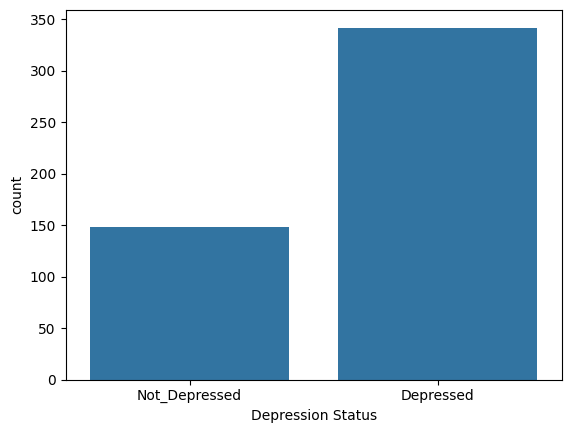

In [ ]:
#Target variable type count
sns.countplot(x='Depression Status', data=df)
plt.show()

In [ ]:
df.columns

Index(['Depression Status', 'Age', 'Gender', 'LA', 'MS ', 'Education', 'EI',
       'HI', 'MPE', 'PIS', 'SMPU', 'SMUTIY', 'RBUSM', 'PDSMPU', 'ENE',
       'PPIVISM', 'APIGDISM', 'ENICBISM', 'SMADRP', 'AC'],
      dtype='object')

In [ ]:
# Creating a new column for the number of social media platforms used by each participants
df['SMPU_N'] = df['SMPU'].apply(lambda x: len(x.split(',')))

In [ ]:
df['SMPU_N']

,SMPU_N
0,4
1,3
2,4
3,4
4,5
...,...
485,3
486,2
487,2
488,2


In [ ]:
df['SMPU']

,SMPU
0,"Facebook, Instagram, LinkedIn, YouTube"
1,"Facebook, LinkedIn, YouTube"
2,"Facebook, Instagram, LinkedIn, YouTube"
3,"Facebook, TikTok, Telegram, WhatsApp"
4,"Facebook, Instagram, LinkedIn, YouTube, Telegram"
...,...
485,"Facebook, Instagram, YouTube"
486,"Facebook, YouTube"
487,"Facebook, LinkedIn"
488,"Facebook, YouTube"


In [ ]:
from collections import Counter
platforms = df['SMPU'].str.cat(sep=', ').split(', ')

# Count the occurrences of each platform
platform_counts = Counter(platforms)

# Convert to DataFrame for better visualization
platform_counts_df = pd.DataFrame(platform_counts.items(), columns=['Platform', 'Count'])

# Display the counts
print(platform_counts_df)

             Platform  Count
0            Facebook    453
1           Instagram    300
2            LinkedIn    153
3             YouTube    353
4              TikTok     35
5            Telegram    128
6           WhatsApp       1
7             Twitter     50
8            Snapchat      5
9            WhatsApp      3
10            Chrome       1
11         What's app      1
12               Zoom      1
13                         6
14    Some gaming app      1
15          Snapchat       2
16                Boo      1
17             Bumble      1
18             Tinder      1
19             Reddit      1
20          Pinterest      1
21          messenger      1
22  Stream TV Series       1
23           Whatsapp      2
24           discord       1
25           Live Mcq      1
26          Messenger      1
27        What's app       3


In [ ]:
r_platforms = df['RBUSM'].str.cat(sep=', ').split(', ')

# Count the occurrences of each platform
platform_counts = Counter(r_platforms)

# Convert to DataFrame for better visualization
platform_counts_df = pd.DataFrame(platform_counts.items(), columns=['r_Platform', 'Count'])

# Display the counts
print(platform_counts_df)

                                        r_Platform  Count
0                              Social Connectivity    389
1                                       Job Search    190
2                                    Entertainment    397
3                      Keeping up with news/events    304
4                           Online Calling Feature    141
5                             Education & Learning    283
6                                    Reels & memes      1
7            Promoting personal/business interests     67
8                                                       3
9                              Just some time pass      1
10                     Getting new people to date.      1
11                                         Texting      1
12                                         datting      1
13                                   communication      1
14                connecting with family & friends      1
15                          and knowing new people      1
16  Keeping my

In [ ]:
df

,Depression Status,Age,Gender,LA,MS,Education,EI,HI,MPE,PIS,...,SMUTIY,RBUSM,PDSMPU,ENE,PPIVISM,APIGDISM,ENICBISM,SMADRP,AC,SMPU_N
0,Not_Depressed,24-26,Male,With Family,Unmarried,Master's Degree,Public University/College,20001-30000,8001 - 10000,Yes,...,More than 5,"Social Connectivity, Job Search, Entertainment...",1-2,Rarely,No,No,No,No,NaN,4
1,Depressed,24-26,Male,Off Campus,Unmarried,Bachelor's Degree,Public University/College,Above 50000,Above 10000,Yes,...,More than 5,"Social Connectivity, Entertainment, Keeping up...",3-4,Sometimes,No,Yes,Yes,No,NaN,3
2,Depressed,24-26,Male,Off Campus,Unmarried,Bachelor's Degree,Public University/College,40001-50000,Below 2000,No,...,1-3,"Social Connectivity, Job Search, Entertainment...",1-2,Sometimes,No,No,Yes,Yes,NaN,4
3,Depressed,24-26,Female,With Family,Unmarried,Master's Degree,Public University/College,Above 50000,Below 2000,No,...,More than 5,"Social Connectivity, Online Calling Feature, E...",5 or more,Rarely,No,Yes,No,Yes,Some of us feel down seeing other happening. I...,4
4,Not_Depressed,24-26,Male,Off Campus,Unmarried,Master's Degree,Public University/College,10000-20000,Above 10000,Yes,...,1-3,"Social Connectivity, Job Search, Education & L...",3-4,Often,Maybe,No,Yes,No,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,Depressed,21-23,Male,On Campus (Hall),Unmarried,Bachelor's Degree,Private University/College,Above 50000,2000 - 5000,No,...,1-3,"Social Connectivity, Entertainment",5 or more,Often,Yes,No,Yes,Yes,No but i have a issue that my past ex told me(...,3
486,Depressed,18-20,Male,Off Campus,Unmarried,Bachelor's Degree,Private University/College,30001-40000,5001 - 8000,No,...,More than 5,Keeping up with news/events,3-4,Often,No,No,No,Yes,No,2
487,Not_Depressed,21-23,Male,Off Campus,Unmarried,Bachelor's Degree,Private University/College,10000-20000,Above 10000,Yes,...,More than 5,"Social Connectivity, Education & Learning, Ent...",5 or more,Often,Maybe,Yes,No,Yes,NaN,2
488,Depressed,21-23,Male,With Family,Unmarried,Bachelor's Degree,Private University/College,30001-40000,2000 - 5000,No,...,More than 5,"Social Connectivity, Entertainment, Keeping up...",5 or more,Sometimes,Maybe,No,Yes,Yes,NaN,2


In [ ]:
#Dropping Unncessary Columns
df.drop('AC', axis=1, inplace=True)
df.drop('RBUSM', axis=1, inplace=True)
df.drop('SMPU', axis=1, inplace=True)
df.drop('PIS', axis=1, inplace=True)
df.drop('MPE', axis=1, inplace=True)
df.drop('MS ', axis=1, inplace=True)

In [ ]:

df.columns

Index(['Depression Status', 'Age', 'Gender', 'LA', 'Education', 'EI', 'HI',
       'SMUTIY', 'PDSMPU', 'ENE', 'PPIVISM', 'APIGDISM', 'ENICBISM', 'SMADRP',
       'SMPU_N'],
      dtype='object')

In [ ]:
df

,Depression Status,Age,Gender,LA,Education,EI,HI,SMUTIY,PDSMPU,ENE,PPIVISM,APIGDISM,ENICBISM,SMADRP,SMPU_N
0,Not_Depressed,24-26,Male,With Family,Master's Degree,Public University/College,20001-30000,More than 5,1-2,Rarely,No,No,No,No,4
1,Depressed,24-26,Male,Off Campus,Bachelor's Degree,Public University/College,Above 50000,More than 5,3-4,Sometimes,No,Yes,Yes,No,3
2,Depressed,24-26,Male,Off Campus,Bachelor's Degree,Public University/College,40001-50000,1-3,1-2,Sometimes,No,No,Yes,Yes,4
3,Depressed,24-26,Female,With Family,Master's Degree,Public University/College,Above 50000,More than 5,5 or more,Rarely,No,Yes,No,Yes,4
4,Not_Depressed,24-26,Male,Off Campus,Master's Degree,Public University/College,10000-20000,1-3,3-4,Often,Maybe,No,Yes,No,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,Depressed,21-23,Male,On Campus (Hall),Bachelor's Degree,Private University/College,Above 50000,1-3,5 or more,Often,Yes,No,Yes,Yes,3
486,Depressed,18-20,Male,Off Campus,Bachelor's Degree,Private University/College,30001-40000,More than 5,3-4,Often,No,No,No,Yes,2
487,Not_Depressed,21-23,Male,Off Campus,Bachelor's Degree,Private University/College,10000-20000,More than 5,5 or more,Often,Maybe,Yes,No,Yes,2
488,Depressed,21-23,Male,With Family,Bachelor's Degree,Private University/College,30001-40000,More than 5,5 or more,Sometimes,Maybe,No,Yes,Yes,2


In [ ]:
df['ENE'].value_counts()

,count
ENE,
Sometimes,211
Often,127
Rarely,88
Always,46
Never,18


In [ ]:
df['Depression Status'] = df['Depression Status'].map({'Depressed': 1, 'Not_Depressed': 0})

In [ ]:
# Demographic variables
demographic_vars = ['Age', 'Gender', 'LA', 'Education', 'EI']

# Creating a summary table
summary_table = {}

for var in demographic_vars:
    # Group by demographic variable and Depression Status, then calculate percentages
    grouped = df.groupby([var, 'Depression Status']).size().unstack(fill_value=0)
    percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100  # Calculate percentages
    summary_table[var] = percentages

# Combine all tables into one
final_table = pd.concat(summary_table, axis=0)

# Display the final table
print("Percentage of Depressed and Not Depressed by Demographic Variables:")
print(final_table)

Percentage of Depressed and Not Depressed by Demographic Variables:
Depression Status                             0          1
Age       18-20                       25.714286  74.285714
          21-23                       28.930818  71.069182
          24-26                       30.620155  69.379845
          Above 26                    36.842105  63.157895
Gender    Female                      28.735632  71.264368
          Male                        31.012658  68.987342
LA        Off Campus                  31.182796  68.817204
          On Campus (Hall)            16.831683  83.168317
          With Family                 34.459459  65.540541
Education Bachelor's Degree           30.508475  69.491525
          Master's Degree             29.743590  70.256410
EI        Private University/College  24.475524  75.524476
          Public University/College   32.564841  67.435159


In [ ]:
total_counts = {}

for var in demographic_vars:
    total_counts[var] = df[var].value_counts()

# Combine results into a single DataFrame for better visualization
total_counts_df = pd.DataFrame({var: total_counts[var] for var in demographic_vars})

# Display the total counts
print("Total Number of Participants in Each Category of Demographic Variables:")
print(total_counts_df)

Total Number of Participants in Each Category of Demographic Variables:
                              Age  Gender     LA  Education     EI
18-20                        35.0     NaN    NaN        NaN    NaN
21-23                       159.0     NaN    NaN        NaN    NaN
24-26                       258.0     NaN    NaN        NaN    NaN
Above 26                     38.0     NaN    NaN        NaN    NaN
Bachelor's Degree             NaN     NaN    NaN      295.0    NaN
Female                        NaN   174.0    NaN        NaN    NaN
Male                          NaN   316.0    NaN        NaN    NaN
Master's Degree               NaN     NaN    NaN      195.0    NaN
Off Campus                    NaN     NaN   93.0        NaN    NaN
On Campus (Hall)              NaN     NaN  101.0        NaN    NaN
Private University/College    NaN     NaN    NaN        NaN  143.0
Public University/College     NaN     NaN    NaN        NaN  347.0
With Family                   NaN     NaN  296.0        N

In [ ]:
# Columns on which OneHotEncoding will be used
columns_to_encode = ['Gender', 'LA','EI', 'APIGDISM', 'ENICBISM', 'SMADRP']

# Initialize the OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Fit and transform the data for encoding
encoded_data = encoder.fit_transform(df[columns_to_encode])

# Convert the encoded data to a DataFrame with appropriate column names
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(columns_to_encode))

# Drop the original columns that were encoded
df = df.drop(columns=columns_to_encode)

# Concatenate the original DataFrame with the encoded DataFrame
df = pd.concat([df, encoded_df], axis=1)

In [ ]:
df

,Depression Status,Age,Education,HI,SMUTIY,PDSMPU,ENE,PPIVISM,SMPU_N,Gender_Male,LA_On Campus (Hall),LA_With Family,EI_Public University/College,APIGDISM_Yes,ENICBISM_Yes,SMADRP_Yes
0,0,24-26,Master's Degree,20001-30000,More than 5,1-2,Rarely,No,4,1.0,0.0,1.0,1.0,0.0,0.0,0.0
1,1,24-26,Bachelor's Degree,Above 50000,More than 5,3-4,Sometimes,No,3,1.0,0.0,0.0,1.0,1.0,1.0,0.0
2,1,24-26,Bachelor's Degree,40001-50000,1-3,1-2,Sometimes,No,4,1.0,0.0,0.0,1.0,0.0,1.0,1.0
3,1,24-26,Master's Degree,Above 50000,More than 5,5 or more,Rarely,No,4,0.0,0.0,1.0,1.0,1.0,0.0,1.0
4,0,24-26,Master's Degree,10000-20000,1-3,3-4,Often,Maybe,5,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,1,21-23,Bachelor's Degree,Above 50000,1-3,5 or more,Often,Yes,3,1.0,1.0,0.0,0.0,0.0,1.0,1.0
486,1,18-20,Bachelor's Degree,30001-40000,More than 5,3-4,Often,No,2,1.0,0.0,0.0,0.0,0.0,0.0,1.0
487,0,21-23,Bachelor's Degree,10000-20000,More than 5,5 or more,Often,Maybe,2,1.0,0.0,0.0,0.0,1.0,0.0,1.0
488,1,21-23,Bachelor's Degree,30001-40000,More than 5,5 or more,Sometimes,Maybe,2,1.0,0.0,1.0,0.0,0.0,1.0,1.0


In [ ]:
# Defining the order for each ordinal column
age_order = ['18-20', '21-23', '24-26', 'Above 26']
education_order = ["Bachelor's Degree", "Master's Degree"]
smutiy_order = ['Less than 1', '1-3', '4-5', 'More than 5']
pdsmpu_order = ['Less than 1', '1-2', '3-4', '5 or more']
ene_order = ['Never', 'Rarely', 'Sometimes', 'Often', 'Always']
hi_order = ['Below 10000', '10000-20000', '20001-30000', '30001-40000', '40001-50000', 'Above 50000']
PPIVISM_order = ['No', 'Maybe', 'Yes']

# Creating a list of orderings in the same order as the columns to encode
categories = [age_order, education_order, smutiy_order, pdsmpu_order, ene_order, hi_order, PPIVISM_order]

# Initialize OrdinalEncoder with the defined category order
encoder = OrdinalEncoder(categories=categories)

# Columns to encode using Ordinal encoder
columns_to_encode = ['Age', 'Education', 'SMUTIY', 'PDSMPU', 'ENE', 'HI', 'PPIVISM']

# Apply the ordinal encoder
df[columns_to_encode] = encoder.fit_transform(df[columns_to_encode])

In [ ]:
df

,Depression Status,Age,Education,HI,SMUTIY,PDSMPU,ENE,PPIVISM,SMPU_N,Gender_Male,LA_On Campus (Hall),LA_With Family,EI_Public University/College,APIGDISM_Yes,ENICBISM_Yes,SMADRP_Yes
0,0,2.0,1.0,2.0,3.0,1.0,1.0,0.0,4,1.0,0.0,1.0,1.0,0.0,0.0,0.0
1,1,2.0,0.0,5.0,3.0,2.0,2.0,0.0,3,1.0,0.0,0.0,1.0,1.0,1.0,0.0
2,1,2.0,0.0,4.0,1.0,1.0,2.0,0.0,4,1.0,0.0,0.0,1.0,0.0,1.0,1.0
3,1,2.0,1.0,5.0,3.0,3.0,1.0,0.0,4,0.0,0.0,1.0,1.0,1.0,0.0,1.0
4,0,2.0,1.0,1.0,1.0,2.0,3.0,1.0,5,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,1,1.0,0.0,5.0,1.0,3.0,3.0,2.0,3,1.0,1.0,0.0,0.0,0.0,1.0,1.0
486,1,0.0,0.0,3.0,3.0,2.0,3.0,0.0,2,1.0,0.0,0.0,0.0,0.0,0.0,1.0
487,0,1.0,0.0,1.0,3.0,3.0,3.0,1.0,2,1.0,0.0,0.0,0.0,1.0,0.0,1.0
488,1,1.0,0.0,3.0,3.0,3.0,2.0,1.0,2,1.0,0.0,1.0,0.0,0.0,1.0,1.0


In [ ]:
df.columns

Index(['Depression Status', 'Age', 'Education', 'HI', 'SMUTIY', 'PDSMPU',
       'ENE', 'PPIVISM', 'SMPU_N', 'Gender_Male', 'LA_On Campus (Hall)',
       'LA_With Family', 'EI_Public University/College', 'APIGDISM_Yes',
       'ENICBISM_Yes', 'SMADRP_Yes'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Depression Status             490 non-null    int64  
 1   Age                           490 non-null    float64
 2   Education                     490 non-null    float64
 3   HI                            490 non-null    float64
 4   SMUTIY                        490 non-null    float64
 5   PDSMPU                        490 non-null    float64
 6   ENE                           490 non-null    float64
 7   PPIVISM                       490 non-null    float64
 8   SMPU_N                        490 non-null    int64  
 9   Gender_Male                   490 non-null    float64
 10  LA_On Campus (Hall)           490 non-null    float64
 11  LA_With Family                490 non-null    float64
 12  EI_Public University/College  490 non-null    float64
 13  APIGD

In [ ]:
df.describe()

,Depression Status,Age,Education,HI,SMUTIY,PDSMPU,ENE,PPIVISM,SMPU_N,Gender_Male,LA_On Campus (Hall),LA_With Family,EI_Public University/College,APIGDISM_Yes,ENICBISM_Yes,SMADRP_Yes
count,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000
mean,0.697959,1.610204,0.397959,3.032653,2.412245,2.040816,2.193878,0.808163,3.077551,0.644898,0.206122,0.604082,0.708163,0.418367,0.381633,0.722449
std,0.459612,0.732741,0.489977,1.756948,0.868356,0.820474,0.962042,0.796166,1.512763,0.479033,0.404933,0.489547,0.455072,0.493795,0.486284,0.448248
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,2.000000,2.000000,2.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,2.000000,0.000000,3.000000,3.000000,2.000000,2.000000,1.000000,3.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,2.000000,1.000000,5.000000,3.000000,3.000000,3.000000,1.000000,4.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,3.000000,1.000000,5.000000,3.000000,3.000000,4.000000,2.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.columns

Index(['Depression Status', 'Age', 'Education', 'HI', 'SMUTIY', 'PDSMPU',
       'ENE', 'PPIVISM', 'SMPU_N', 'Gender_Male', 'LA_On Campus (Hall)',
       'LA_With Family', 'EI_Public University/College', 'APIGDISM_Yes',
       'ENICBISM_Yes', 'SMADRP_Yes'],
      dtype='object')

In [ ]:
df

,Depression Status,Age,Education,HI,SMUTIY,PDSMPU,ENE,PPIVISM,SMPU_N,Gender_Male,LA_On Campus (Hall),LA_With Family,EI_Public University/College,APIGDISM_Yes,ENICBISM_Yes,SMADRP_Yes
0,0,2.0,1.0,2.0,3.0,1.0,1.0,0.0,4,1.0,0.0,1.0,1.0,0.0,0.0,0.0
1,1,2.0,0.0,5.0,3.0,2.0,2.0,0.0,3,1.0,0.0,0.0,1.0,1.0,1.0,0.0
2,1,2.0,0.0,4.0,1.0,1.0,2.0,0.0,4,1.0,0.0,0.0,1.0,0.0,1.0,1.0
3,1,2.0,1.0,5.0,3.0,3.0,1.0,0.0,4,0.0,0.0,1.0,1.0,1.0,0.0,1.0
4,0,2.0,1.0,1.0,1.0,2.0,3.0,1.0,5,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,1,1.0,0.0,5.0,1.0,3.0,3.0,2.0,3,1.0,1.0,0.0,0.0,0.0,1.0,1.0
486,1,0.0,0.0,3.0,3.0,2.0,3.0,0.0,2,1.0,0.0,0.0,0.0,0.0,0.0,1.0
487,0,1.0,0.0,1.0,3.0,3.0,3.0,1.0,2,1.0,0.0,0.0,0.0,1.0,0.0,1.0
488,1,1.0,0.0,3.0,3.0,3.0,2.0,1.0,2,1.0,0.0,1.0,0.0,0.0,1.0,1.0


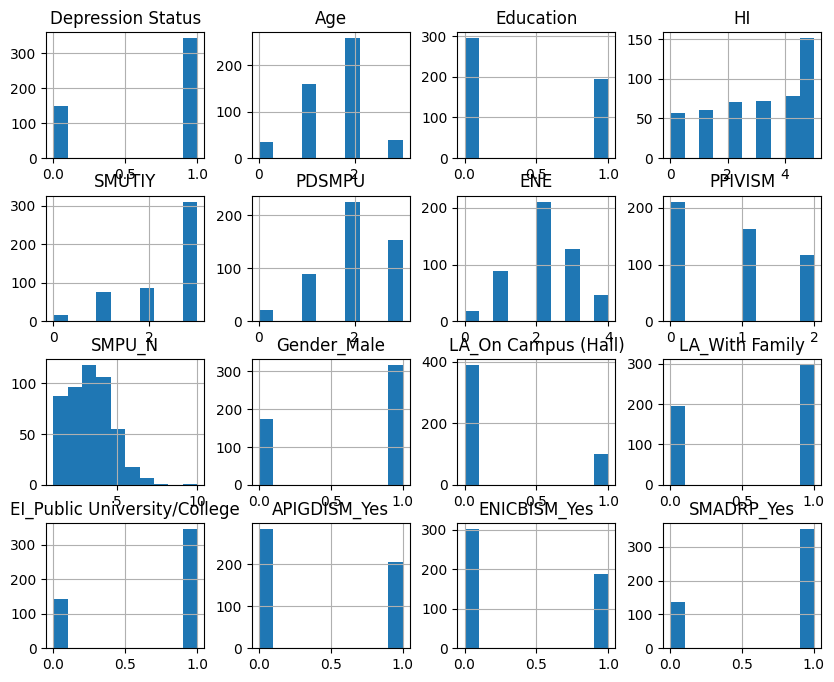

In [ ]:
# For numerical variables
df.hist(figsize=(10, 8))
plt.show()

**Updated correlation matrix**

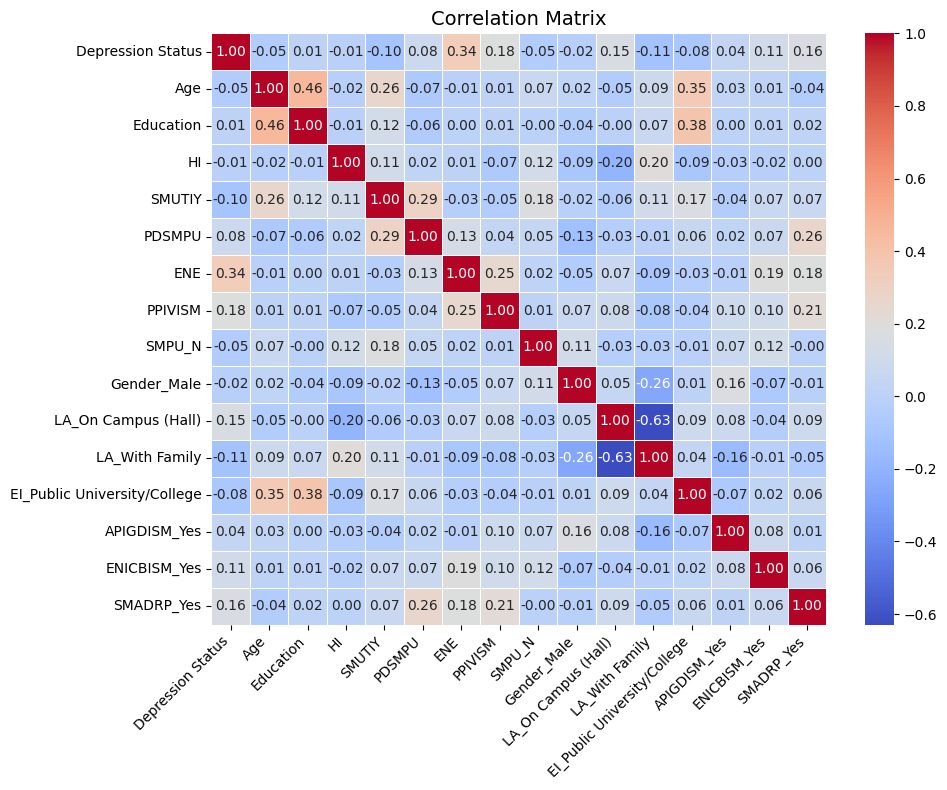

In [ ]:
corr_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, annot_kws={"size": 10})
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title('Correlation Matrix', fontsize=14)
plt.tight_layout()
plt.show()


In [ ]:
# Pairplot for relationships
#sns.pairplot(df, hue='Depression Status')
#plt.show()

In [ ]:
#defining the target and predictor variables
x = df.drop('Depression Status', axis=1)
y = df['Depression Status']

In [ ]:
x

,Age,Education,HI,SMUTIY,PDSMPU,ENE,PPIVISM,SMPU_N,Gender_Male,LA_On Campus (Hall),LA_With Family,EI_Public University/College,APIGDISM_Yes,ENICBISM_Yes,SMADRP_Yes
0,2.0,1.0,2.0,3.0,1.0,1.0,0.0,4,1.0,0.0,1.0,1.0,0.0,0.0,0.0
1,2.0,0.0,5.0,3.0,2.0,2.0,0.0,3,1.0,0.0,0.0,1.0,1.0,1.0,0.0
2,2.0,0.0,4.0,1.0,1.0,2.0,0.0,4,1.0,0.0,0.0,1.0,0.0,1.0,1.0
3,2.0,1.0,5.0,3.0,3.0,1.0,0.0,4,0.0,0.0,1.0,1.0,1.0,0.0,1.0
4,2.0,1.0,1.0,1.0,2.0,3.0,1.0,5,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,1.0,0.0,5.0,1.0,3.0,3.0,2.0,3,1.0,1.0,0.0,0.0,0.0,1.0,1.0
486,0.0,0.0,3.0,3.0,2.0,3.0,0.0,2,1.0,0.0,0.0,0.0,0.0,0.0,1.0
487,1.0,0.0,1.0,3.0,3.0,3.0,1.0,2,1.0,0.0,0.0,0.0,1.0,0.0,1.0
488,1.0,0.0,3.0,3.0,3.0,2.0,1.0,2,1.0,0.0,1.0,0.0,0.0,1.0,1.0


In [ ]:
#dividing the data into training and testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=26)

In [ ]:
#standard scaler
#scaler = StandardScaler()
#x_train = scaler.fit_transform(x_train)
#x_test = scaler.transform(x_test)
#convert to data frame
#x_train = pd.DataFrame(x_train, columns=x.columns)
#x_test = pd.DataFrame(x_test, columns=x.columns)

In [ ]:
# Defining the classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Support Vector Machine": SVC(kernel='linear'),  # rbf provides the same accuracy as poly, linear provides the highest accuracy
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=13),
    "Multilayer Perceptron": MLPClassifier(hidden_layer_sizes=(50,), max_iter=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=4, max_leaf_nodes=3),
    "Random Forest": RandomForestClassifier(max_depth = 10, n_estimators = 150, random_state=42)
}

#Function to calculate sensitivity and specificity
def calculate_metrics(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()  # Get TP, TN, FP, FN from the confusion matrix
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0  # Recall
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0  # Specificity
    return accuracy, f1, sensitivity, specificity

#Iterating through classifiers and evaluating them
for name, clf in classifiers.items():
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    accuracy, f1, sensitivity, specificity = calculate_metrics(y_test, y_pred)

    # Print the results

    print(f"{name}:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  F1 Score: {f1:.4f}")
    print(f"  Sensitivity: {sensitivity:.4f}")
    print(f"  Specificity: {specificity:.4f}")
    # Print classification report
    print(f"\n{name}:")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print()

Logistic Regression:
  Accuracy: 0.7857
  F1 Score: 0.8591
  Sensitivity: 0.9275
  Specificity: 0.4483

Logistic Regression:

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.45      0.55        29
           1       0.80      0.93      0.86        69

    accuracy                           0.79        98
   macro avg       0.76      0.69      0.71        98
weighted avg       0.78      0.79      0.77        98


Support Vector Machine:
  Accuracy: 0.7551
  F1 Score: 0.8421
  Sensitivity: 0.9275
  Specificity: 0.3448

Support Vector Machine:

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.34      0.45        29
           1       0.77      0.93      0.84        69

    accuracy                           0.76        98
   macro avg       0.72      0.64      0.65        98
weighted avg       0.74      0.76      0.73        98


K-Nearest Neighbors:
  Accuracy: 0.7245


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Multilayer Perceptron:
  Accuracy: 0.7653
  F1 Score: 0.8456
  Sensitivity: 0.9130
  Specificity: 0.4138

Multilayer Perceptron:

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.41      0.51        29
           1       0.79      0.91      0.85        69

    accuracy                           0.77        98
   macro avg       0.73      0.66      0.68        98
weighted avg       0.75      0.77      0.75        98


Decision Tree:
  Accuracy: 0.7551
  F1 Score: 0.8356
  Sensitivity: 0.8841
  Specificity: 0.4483

Decision Tree:

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.45      0.52        29
           1       0.79      0.88      0.84        69

    accuracy                           0.76        98
   macro avg       0.71      0.67      0.68        98
weighted avg       0.74      0.76      0.74        98


Random Forest:
  Accuracy: 0.7653
  F1 Score: 0.8435
 

**Five fold cross validation**

In [ ]:
from sklearn.model_selection import cross_val_predict, KFold

kf = KFold(n_splits=5, shuffle=True, random_state=25)

for name, clf in classifiers.items():
    y_pred = cross_val_predict(clf, x_train, y_train, cv=kf)

    accuracy, f1, sensitivity, specificity = calculate_metrics(y_train, y_pred)

    print(f"{name}:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  F1 Score: {f1:.4f}")
    print(f"  Sensitivity: {sensitivity:.4f}")
    print(f"  Specificity: {specificity:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_train, y_pred))
    print("-" * 50)


Logistic Regression:
  Accuracy: 0.7245
  F1 Score: 0.8188
  Sensitivity: 0.8938
  Specificity: 0.3361

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.34      0.43       119
           1       0.76      0.89      0.82       273

    accuracy                           0.72       392
   macro avg       0.67      0.61      0.62       392
weighted avg       0.70      0.72      0.70       392

--------------------------------------------------
Support Vector Machine:
  Accuracy: 0.6990
  F1 Score: 0.8121
  Sensitivity: 0.9341
  Specificity: 0.1597

Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.16      0.24       119
           1       0.72      0.93      0.81       273

    accuracy                           0.70       392
   macro avg       0.62      0.55      0.53       392
weighted avg       0.66      0.70      0.64       392

--------------------------------------

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptro

Multilayer Perceptron:
  Accuracy: 0.7245
  F1 Score: 0.8182
  Sensitivity: 0.8901
  Specificity: 0.3445

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.34      0.43       119
           1       0.76      0.89      0.82       273

    accuracy                           0.72       392
   macro avg       0.67      0.62      0.62       392
weighted avg       0.70      0.72      0.70       392

--------------------------------------------------
Decision Tree:
  Accuracy: 0.7066
  F1 Score: 0.8112
  Sensitivity: 0.9048
  Specificity: 0.2521

Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.25      0.34       119
           1       0.74      0.90      0.81       273

    accuracy                           0.71       392
   macro avg       0.64      0.58      0.58       392
weighted avg       0.67      0.71      0.67       392

---------------------------------------------

In [ ]:
# Combine X_test and y_test for easier analysis
test_set = x_test.copy()
test_set['depression'] = y_test

# Calculate the proportion of Depressed and Not Depressed in the testing set
depressed_proportions = y_test.value_counts(normalize=True)

# Display the proportions
print("Proportion of Depressed (1) and Not Depressed (0) in the Testing Set:")
print(depressed_proportions)

# display as percentages
depressed_percentages = depressed_proportions * 100
print("\nPercentages of Depressed (1) and Not Depressed (0) in the Testing Set:")
print(depressed_percentages)

Proportion of Depressed (1) and Not Depressed (0) in the Testing Set:
Depression Status
1    0.704082
0    0.295918
Name: proportion, dtype: float64

Percentages of Depressed (1) and Not Depressed (0) in the Testing Set:
Depression Status
1    70.408163
0    29.591837
Name: proportion, dtype: float64


In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report

# classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Support Vector Machine": SVC(kernel='linear'),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=13),
    "Multilayer Perceptron": MLPClassifier(hidden_layer_sizes=(50,), max_iter=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=4, max_leaf_nodes=3),
    "Random Forest": RandomForestClassifier(max_depth=10, n_estimators=150, random_state=42)
}

# Function to calculate sensitivity and specificity
def calculate_metrics(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0  # Recall
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0  # Specificity
    return accuracy, f1, sensitivity, specificity

# DataFrame to store results
results = []

# Iterating through classifiers and evaluating them
for name, clf in classifiers.items():
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    accuracy, f1, sensitivity, specificity = calculate_metrics(y_test, y_pred)

    # Append the metrics to the results
    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "F1 Score": f1,
        "Sensitivity": sensitivity,
        "Specificity": specificity
    })

# Convert the results to a DataFrame
results_df = pd.DataFrame(results)

# Display the results as a table
print("Evaluation Metrics for All Models:")
print(results_df)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Evaluation Metrics for All Models:
                    Model  Accuracy  F1 Score  Sensitivity  Specificity
0     Logistic Regression  0.785714  0.859060     0.927536     0.448276
1  Support Vector Machine  0.755102  0.842105     0.927536     0.344828
2     K-Nearest Neighbors  0.724490  0.821192     0.898551     0.310345
3   Multilayer Perceptron  0.765306  0.845638     0.913043     0.413793
4           Decision Tree  0.755102  0.835616     0.884058     0.448276
5           Random Forest  0.765306  0.843537     0.898551     0.448276


In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix

# Create an empty list to store confusion matrix results
confusion_matrix_results = []

# Iterate through classifiers and evaluate them
for name, clf in classifiers.items():
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)

    # Calculate confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    # Append the results to the list
    confusion_matrix_results.append({
        "Model": name,
        "True Negatives (TN)": tn,
        "False Positives (FP)": fp,
        "False Negatives (FN)": fn,
        "True Positives (TP)": tp
    })

# Convert the results into a DataFrame
confusion_matrix_df = pd.DataFrame(confusion_matrix_results)

# Display the table
print("Confusion Matrix Results for All Models:")
print(confusion_matrix_df)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Confusion Matrix Results for All Models:
                    Model  True Negatives (TN)  False Positives (FP)  \
0     Logistic Regression                   13                    16   
1  Support Vector Machine                   10                    19   
2     K-Nearest Neighbors                    9                    20   
3   Multilayer Perceptron                   12                    17   
4           Decision Tree                   13                    16   
5           Random Forest                   13                    16   

   False Negatives (FN)  True Positives (TP)  
0                     5                   64  
1                     5                   64  
2                     7                   62  
3                     6                   63  
4                     8                   61  
5                     7                   62  


**ROC curve**

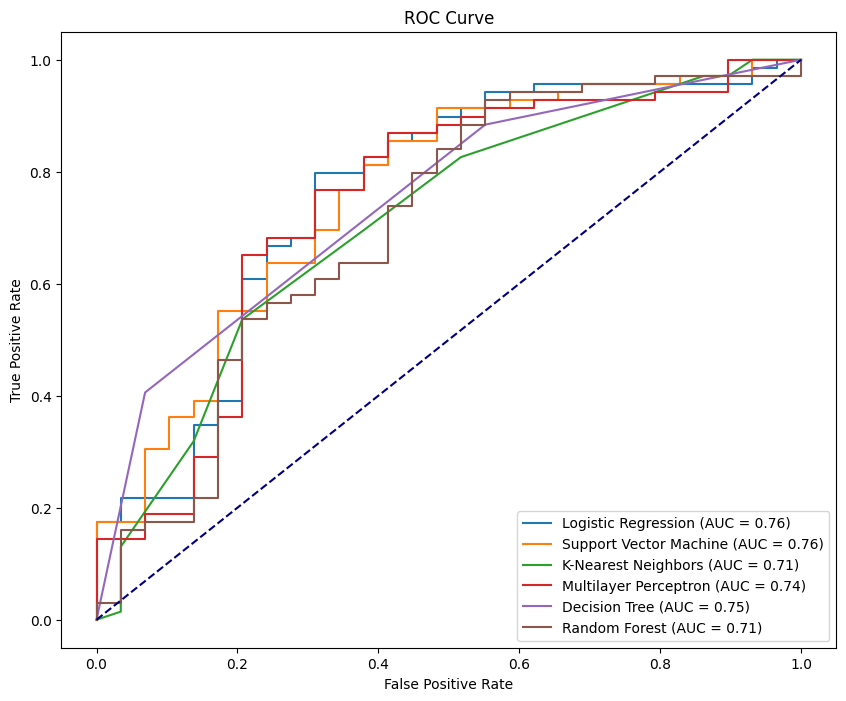

In [ ]:
#Function to plot ROC curve
def plot_roc_curve(y_test, y_proba, name):
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")

#Plotting ROC curve
plt.figure(figsize=(10, 8))
for name, clf in classifiers.items():
    y_proba = clf.predict_proba(x_test)[:, 1] if hasattr(clf, "predict_proba") else clf.decision_function(x_test)
    plot_roc_curve(y_test, y_proba, name)

# ROC plot
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # Diagonal line
plt.show()

**Confusion Matrix**


Logistic Regression: Confusion Matrix


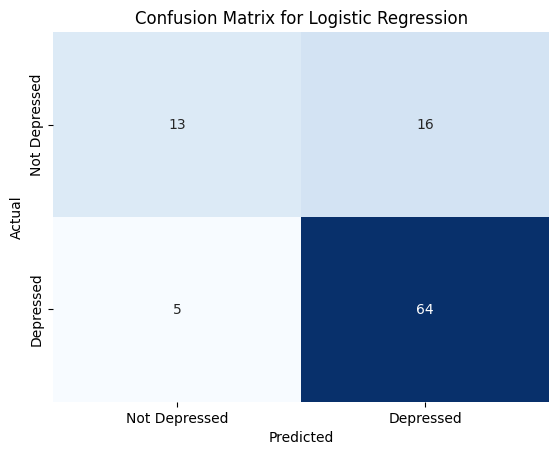


Support Vector Machine: Confusion Matrix


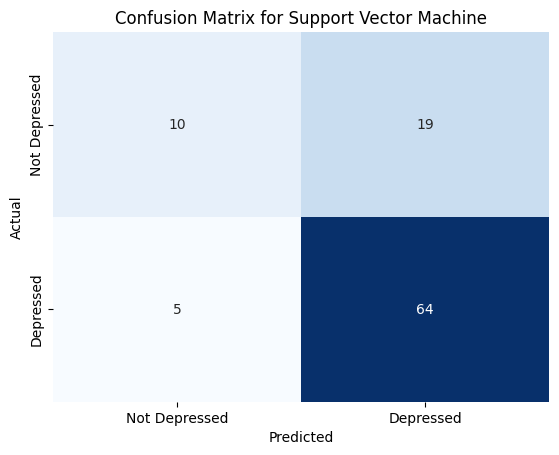


K-Nearest Neighbors: Confusion Matrix


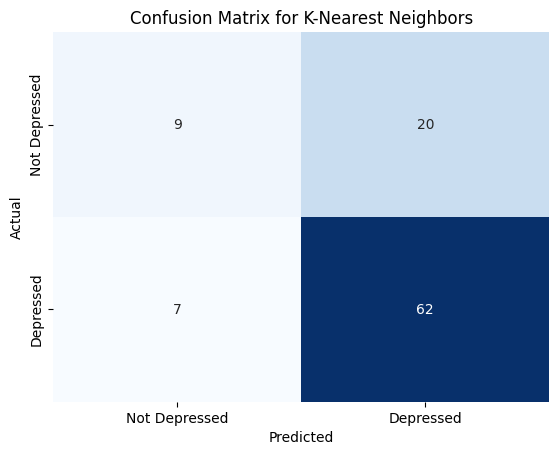

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



Multilayer Perceptron: Confusion Matrix


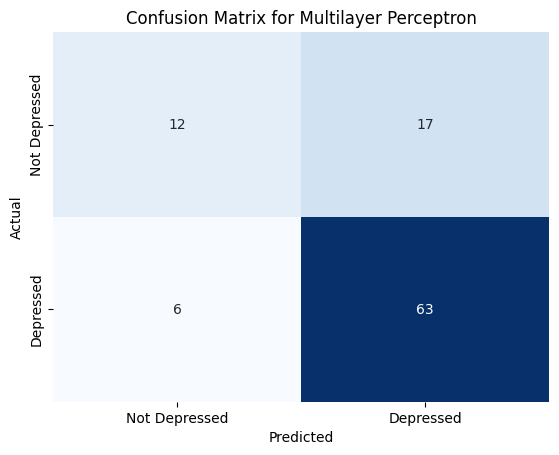


Decision Tree: Confusion Matrix


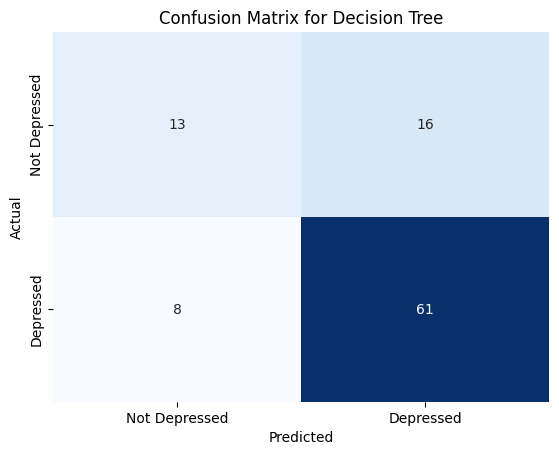


Random Forest: Confusion Matrix


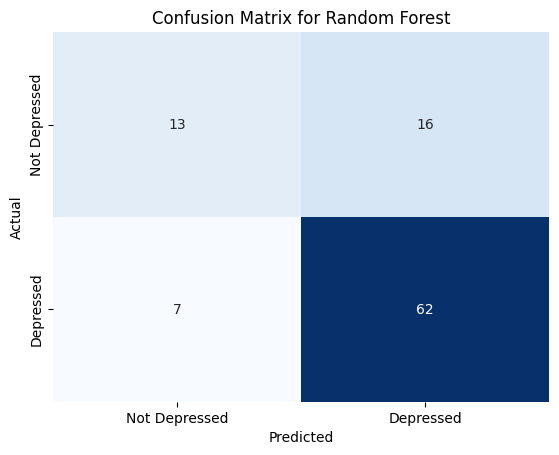

In [ ]:
# Plot Confusion Matrix with custom labels
for name, clf in classifiers.items():
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    y_proba = clf.predict_proba(x_test)[:, 1] if hasattr(clf, "predict_proba") else clf.decision_function(x_test)

    print(f"\n{name}: Confusion Matrix")
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Plot Confusion Matrix with custom axis labels
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=["Not Depressed", "Depressed"], yticklabels=["Not Depressed", "Depressed"])
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [ ]:
x

,Age,Education,HI,SMUTIY,PDSMPU,ENE,PPIVISM,SMPU_N,Gender_Male,LA_On Campus (Hall),LA_With Family,EI_Public University/College,APIGDISM_Yes,ENICBISM_Yes,SMADRP_Yes
0,2.0,1.0,2.0,3.0,1.0,1.0,0.0,4,1.0,0.0,1.0,1.0,0.0,0.0,0.0
1,2.0,0.0,5.0,3.0,2.0,2.0,0.0,3,1.0,0.0,0.0,1.0,1.0,1.0,0.0
2,2.0,0.0,4.0,1.0,1.0,2.0,0.0,4,1.0,0.0,0.0,1.0,0.0,1.0,1.0
3,2.0,1.0,5.0,3.0,3.0,1.0,0.0,4,0.0,0.0,1.0,1.0,1.0,0.0,1.0
4,2.0,1.0,1.0,1.0,2.0,3.0,1.0,5,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,1.0,0.0,5.0,1.0,3.0,3.0,2.0,3,1.0,1.0,0.0,0.0,0.0,1.0,1.0
486,0.0,0.0,3.0,3.0,2.0,3.0,0.0,2,1.0,0.0,0.0,0.0,0.0,0.0,1.0
487,1.0,0.0,1.0,3.0,3.0,3.0,1.0,2,1.0,0.0,0.0,0.0,1.0,0.0,1.0
488,1.0,0.0,3.0,3.0,3.0,2.0,1.0,2,1.0,0.0,1.0,0.0,0.0,1.0,1.0


**Logistic Regression important features (Using Permutaion Importance)**

In [ ]:
from sklearn.inspection import permutation_importance

logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(x_train, y_train)

result = permutation_importance(logistic_model, x_test, y_test, n_repeats=10, random_state=42)

permutation_importances_df = pd.DataFrame({
    'Feature': x.columns,
    'Importance': result.importances_mean,
    'Importance Std': result.importances_std
})

permutation_importances_df = permutation_importances_df.sort_values('Importance', ascending=False)

print(permutation_importances_df)


                         Feature  Importance  Importance Std
5                            ENE    0.121429        0.031102
14                    SMADRP_Yes    0.041837        0.019063
11  EI_Public University/College    0.041837        0.015442
4                         PDSMPU    0.029592        0.014752
3                         SMUTIY    0.024490        0.017791
2                             HI    0.023469        0.018282
9            LA_On Campus (Hall)    0.018367        0.011900
13                  ENICBISM_Yes    0.016327        0.012245
6                        PPIVISM    0.016327        0.021501
7                         SMPU_N    0.015306        0.013879
10                LA_With Family    0.003061        0.004676
12                  APIGDISM_Yes    0.003061        0.010255
8                    Gender_Male   -0.001020        0.010653
0                            Age   -0.007143        0.004676
1                      Education   -0.020408        0.015808


<ipython-input-48-75b7be1336bb>:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(result.importances[sorted_idx].T, vert=False, patch_artist=True, labels=np.array(x.columns)[sorted_idx])


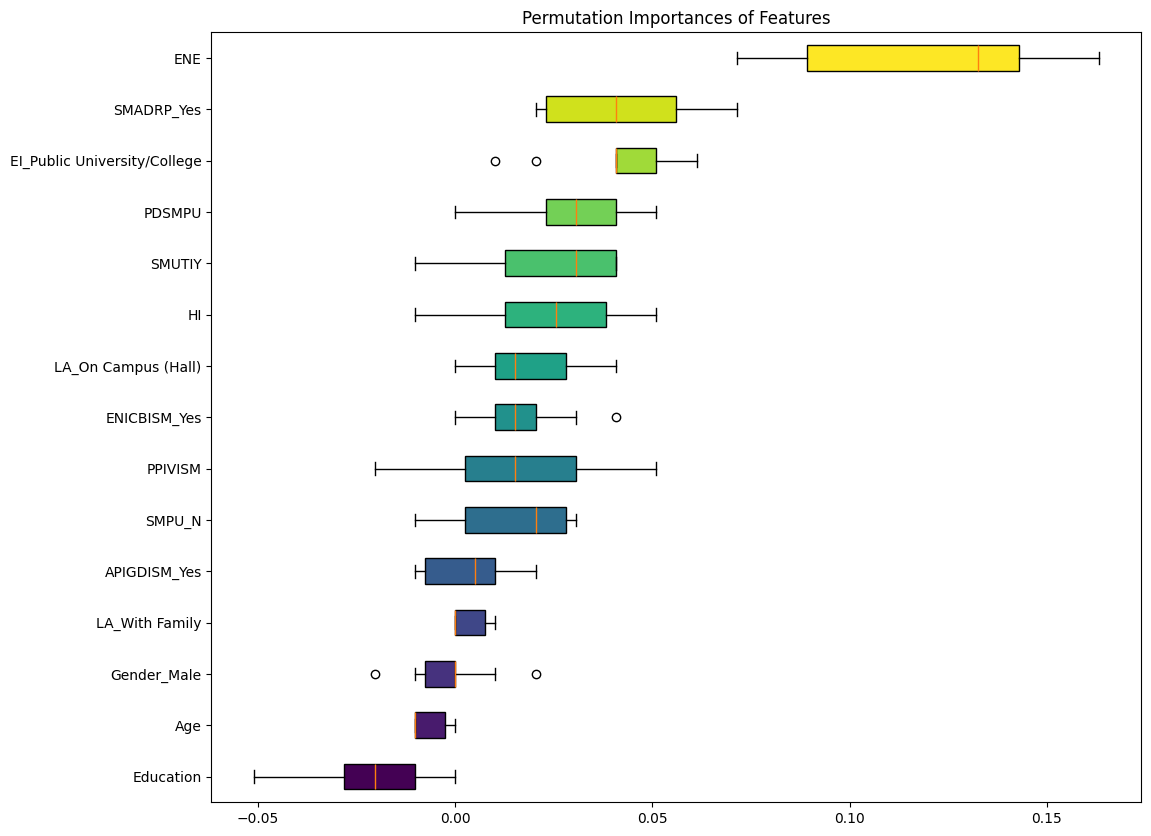

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


# Create a sorted index for the features based on their importance
sorted_idx = result.importances_mean.argsort()

# colors
colors = plt.cm.viridis(np.linspace(0, 1, len(sorted_idx)))

plt.figure(figsize=(12, 10))
box = plt.boxplot(result.importances[sorted_idx].T, vert=False, patch_artist=True, labels=np.array(x.columns)[sorted_idx])

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)


plt.title('Permutation Importances of Features')
plt.show()


In [ ]:
pip install shap

**SHAP Explainer**

In [ ]:
import shap

# Calculate SHAP values using Logistic Regression
model = classifiers['Logistic Regression']
explainer = shap.LinearExplainer(model, x_train)
shap_values_new = explainer.shap_values(x_test)

# Create a DataFrame for mean absolute SHAP values for new data
shap_importance_new = pd.DataFrame({
    'Feature': x_test.columns,
    'Mean SHAP Value': np.abs(shap_values_new).mean(axis=0)
})

# Sort and display SHAP values for all features in new data
shap_importance_sorted_new = shap_importance_new.sort_values(by="Mean SHAP Value", ascending=False)
print("\nSHAP Values for New Data using Logistic Regression:")
print(shap_importance_sorted_new)


SHAP Values for New Data using Logistic Regression:
                         Feature  Mean SHAP Value
5                            ENE         0.553736
9            LA_On Campus (Hall)         0.346935
3                         SMUTIY         0.282735
1                      Education         0.190166
13                  ENICBISM_Yes         0.175597
11  EI_Public University/College         0.157504
14                    SMADRP_Yes         0.112103
7                         SMPU_N         0.078201
6                        PPIVISM         0.077867
8                    Gender_Male         0.066518
2                             HI         0.065121
12                  APIGDISM_Yes         0.055843
4                         PDSMPU         0.054628
0                            Age         0.013977
10                LA_With Family         0.003868


Age

Gender

Living Arrangements (LA)

Education

Educational Institutions (EI)

Household Income (HI)

Number of Social media platforms Used (SMPU_N)

Number of years of social media usage (SMUTIY)

Per day social media usage time (In Hour) (PDSMPU)

Experiences of negative emotion (e.g., stress, anxiety, sadness) in social media. (ENE)

Pressure to show the idealized version on social media (PPIVISM)

Actively participate in group discussions or communities on social media platforms (APIGDISM)

Experienced negative interactions or cyberbullying on social media (ENICBISM)

Social media use affects daily routine and productivity (SMADRP)

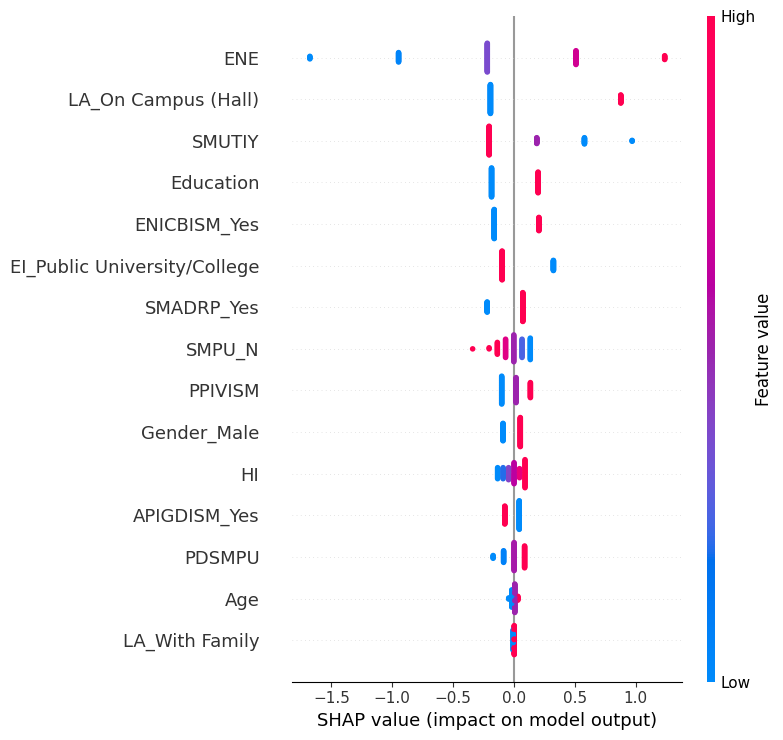

In [ ]:
x_sample = x_test.sample(min(100, len(x_test)), random_state=42)

explainer = shap.LinearExplainer(logistic_model, x_train)

shap_values = explainer.shap_values(x_sample)

shap.summary_plot(shap_values, x_sample, feature_names=x.columns)


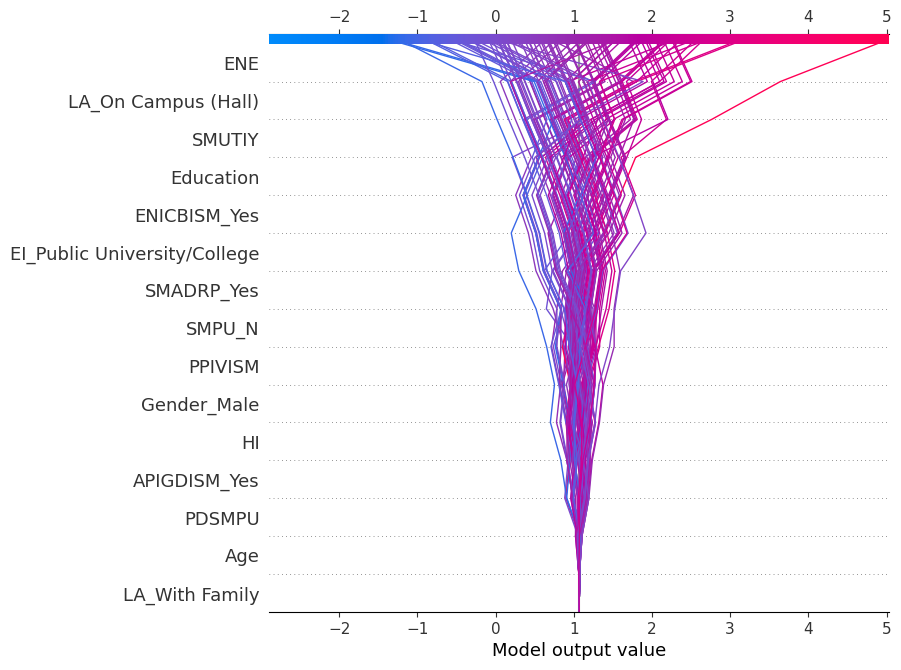

In [ ]:
shap.decision_plot(explainer.expected_value, shap_values, x_sample)
